### grangercasualitytests()

The built-in function `grangercasualitytest()` from `statsmodels` library will be used for the hypothesis testing.

The function implements the Granger causality framework, which statistically evaluates whether past values of one time series contain useful information for predicting another time series beyond what is contained in its own past values. Specifically, the function first constructs two regression models for each tested lag: a restricted model where the target variable is regressed only on its own past values, and an unrestricted model where the target variable is regressed on both its own past values and the past values of the predictor variable. It then performs an F-test to compare the goodness-of-fit between these two models. As a result, it returns statistics such as the F-statistic and the associated p-value for each lag tested. The findings help establish a potential causal relationship by showing whether the inclusion of lagged information from one variable significantly improves the prediction of the other, thus indicating predictive causality according to Granger's definition.


A significance threshold of 0.05 will be used for the p-value: if the p-value falls below 0.05, the null hypothesis of no Granger causality will be rejected.  




## Hypothesis

- **H_0:** Political instability has no effect on the level of terrorism.

- **H_1:** Political instability leads to increased terrorism.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests

### Recap of The relevant findings from the EDA of the Datasets

In [2]:
# Prepration of the Data (as seen is EDA analysis)
gtd = pd.read_excel("gtd.xlsx")
rl = pd.read_csv("API_RL.PER.RNK_DS2_en_csv_v2_27865.csv")
cc = pd.read_csv("API_CC.PER.RNK_DS2_en_csv_v2_21140.csv")

In [42]:
freq_years = gtd[(gtd['iyear'] >= 2000) &( gtd['iyear'] <= 2020) & (gtd['country_txt'] == 'Turkey')].groupby('iyear').size().sort_index() # freq of attacks over the years

In [43]:
filter = np.insert(rl.columns[44:-5].values, 0, 'Country Name')

rl_turkey = rl[filter][rl['Country Name'] == 'Turkiye']
indx = rl_turkey.columns[1:]
vals = rl_turkey.values[0][1:]
vals[1] = (vals[0] + vals[2]) / 2 # Imputing the missing value with the average proceeding and preceeding values
rl_turkey = pd.DataFrame(vals, index=indx, columns=['RL'])

cc_turkey = cc[filter][cc['Country Name'] == 'Turkiye']
indx = cc_turkey.columns[1:]
vals = cc_turkey.values[0][1:]
vals[1] = (vals[0] + vals[2]) / 2 # Imputing the missing value with the average proceeding and preceeding values
cc_turkey = pd.DataFrame(vals, index=indx, columns=['CC'])

rl_cc = pd.concat([rl_turkey,cc_turkey],axis=1)


In [ ]:
freq_years.index = freq_years.index.astype(str)
freq_years = pd.DataFrame(freq_years)
tr_data = pd.concat([rl_cc,freq_years], axis=1)
tr_data.columns = [tr_data.columns[0], tr_data.columns[1],'Freq']
tr_data

,RL,CC,Freq
2000,49.253731,46.80851,35
2001,49.502487,40.864573,19
2002,49.751244,34.920635,5
2003,55.223881,49.735451,19
2004,57.21154,50.246304,27
2005,56.459332,56.097561,41
2006,53.110046,57.560974,43
2007,53.588516,59.223301,30
2008,55.28846,61.165047,32
2009,56.398106,60.287083,13


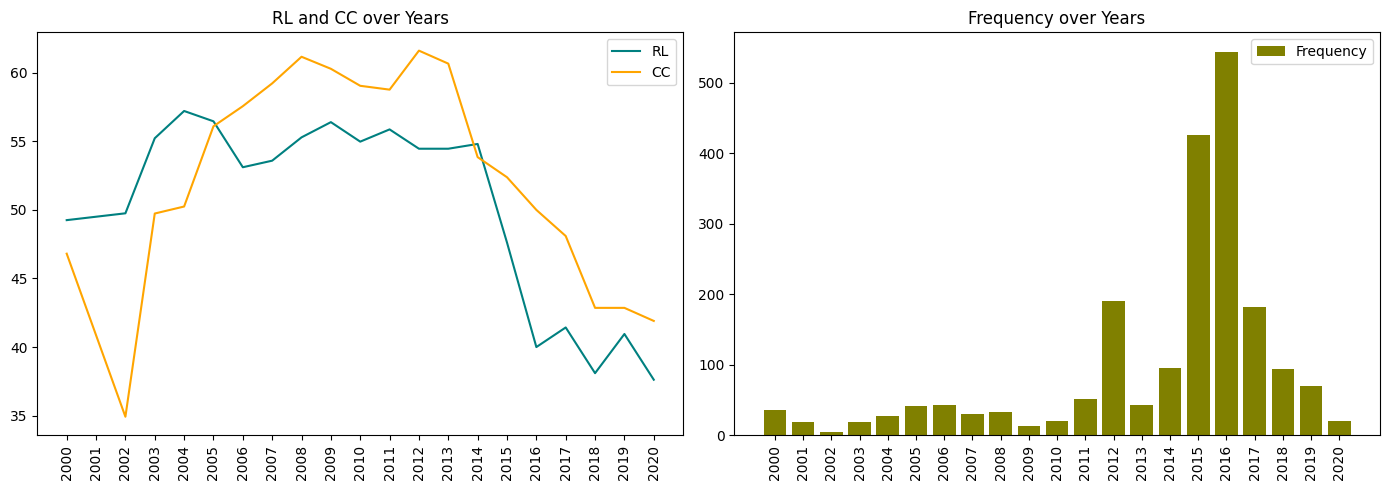

In [69]:
years = tr_data.index
rl_vals = tr_data['RL'].values
cc_vals = tr_data['CC'].values
freq_vals = tr_data['Freq'].values


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].plot(years, rl_vals, label='RL', color='teal')
axes[0].plot(years, cc_vals, label='CC', color='orange')
axes[0].set_xticks(years)
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend()
axes[0].set_title('RL and CC over Years')


axes[1].bar(years, freq_vals, label='Frequency', color='olive')
axes[1].set_xticks(years)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend()
axes[1].set_title('Frequency over Years')

plt.tight_layout()
plt.show()


### Hypothesis Testing

In [72]:
# Combining RL and CL into a single metric for Granger Casuality Testing

tr_data['Instability'] = (tr_data['RL'] + tr_data['CC']) / 2
tr_data.head()

,RL,CC,Freq,Instability
2000,49.253731,46.80851,35,48.03112
2001,49.502487,40.864573,19,45.18353
2002,49.751244,34.920635,5,42.335939
2003,55.223881,49.735451,19,52.479666
2004,57.21154,50.246304,27,53.728922


In [77]:
# Does Instability cause Terrorism?
grangercausalitytests(tr_data[['Freq', 'Instability']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8521  , p=0.3689  , df_denom=17, df_num=1
ssr based chi2 test:   chi2=1.0025  , p=0.3167  , df=1
likelihood ratio test: chi2=0.9781  , p=0.3227  , df=1
parameter F test:         F=0.8521  , p=0.3689  , df_denom=17, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7829  , p=0.4761  , df_denom=14, df_num=2
ssr based chi2 test:   chi2=2.1250  , p=0.3456  , df=2
likelihood ratio test: chi2=2.0143  , p=0.3652  , df=2
parameter F test:         F=0.7829  , p=0.4761  , df_denom=14, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9142  , p=0.4656  , df_denom=11, df_num=3
ssr based chi2 test:   chi2=4.4878  , p=0.2134  , df=3
likelihood ratio test: chi2=4.0069  , p=0.2607  , df=3
parameter F test:         F=0.9142  , p=0.4656  , df_denom=11, df_num=3


{np.int64(1): ({'ssr_ftest': (np.float64(0.8520905093612144),
    np.float64(0.3688784263383519),
    np.float64(17.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(1.0024594227778993),
    np.float64(0.3167161304642844),
    np.int64(1)),
   'lrtest': (np.float64(0.9781454536467891),
    np.float64(0.3226570930557496),
    np.int64(1)),
   'params_ftest': (np.float64(0.8520905093612157),
    np.float64(0.3688784263383519),
    np.float64(17.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.7828953093386672),
    np.float64(0.4760997568729089),
    np.float64(14.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(2.1250015539192395),
    np.float64(0.3455904840670192),
    np.int64(2)),
   'lrtest': (np.float64(2.014347085066902),
    np.float64(0.3652498852449978),
    np.int64(2)),
   'params_ftest': (np.float64(0.7828953093386715),
    np.float64(0.47609975687290734),
    np.float64(14.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
          

### Granger Causality Results
**Number of lags (no zero)**: 1  
- **SSR based F test**: F = 0.8521, p = 0.3689, df_denom = 17, df_num = 1  
- **SSR based chi² test**: chi² = 1.0025, p = 0.3167, df = 1  
- **Likelihood ratio test**: chi² = 0.9781, p = 0.3227, df = 1  
- **Parameter F test**: F = 0.8521, p = 0.3689, df_denom = 17, df_num = 1  

---

### Granger Causality  
**Number of lags (no zero)**: 2  
- **SSR based F test**: F = 0.7829, p = 0.4761, df_denom = 14, df_num = 2  
- **SSR based chi² test**: chi² = 2.1250, p = 0.3456, df = 2  
- **Likelihood ratio test**: chi² = 2.0143, p = 0.3652, df = 2  
- **Parameter F test**: F = 0.7829, p = 0.4761, df_denom = 14, df_num = 2  

---

### Granger Causality  
**Number of lags (no zero)**: 3  
- **SSR based F test**: F = 0.9142, p = 0.4656, df_denom = 11, df_num = 3  
- **SSR based chi² test**: chi² = 4.4878, p = 0.2134, df = 3  
- **Likelihood ratio test**: chi² = 4.0069, p = 0.2607, df = 3  
- **Parameter F test**: F = 0.9142, p = 0.4656, df_denom = 11, df_num = 3  


As shown by the results, for each lag (i.e., the number of previous observations used to predict the next value), the p-value of the Chi-squared test remains significantly higher than the standard significance threshold of 0.05.

Although visual inspection of the figures suggests a potential correlation between RL and CC percentiles, statistically, the evidence is not strong enough to reject the null hypothesis — that is, political instability does not have a significant effect on the level of terrorism.

It is important to recognize that terrorism and political instability are complex, multifaceted phenomena. Reducing them to a few quantitative metrics may oversimplify their dynamics. Hence, while quantitative analysis provides valuable insights, it should be complemented with qualitative perspectives that consider historical, social, and geopolitical contexts. Future research may benefit from more granular datasets, advanced causal inference methods, and interdisciplinary approaches to better capture the nuances of these deeply interconnected issues.